In [1]:
library("foreign")
rawdata=read.arff("./caesarian.csv.arff")
colnames(rawdata) = c("Age","DN","DT","BP","HP","CS")
str(rawdata)

'data.frame':	80 obs. of  6 variables:
 $ Age: Factor w/ 22 levels "17","18","19",..: 6 10 10 12 6 10 11 16 12 11 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 2 1 2 1 2 3 2 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 1 2 1 1 2 1 1 1 2 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 2 3 2 1 2 2 2 2 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ CS : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 2 1 2 ...


In [2]:
## check missing value
norg=length(rawdata[,1])
## remove rows containing missing values  
rawdata=na.omit(rawdata)
morg=length(rawdata[,1])
if( norg == morg ){ print("No rows containging missing value")}
if( norg != morg ){ print("Number of missing value="); print(norg-morg)}

[1] "No rows containging missing value"


In [3]:
## cross-tab except Age(numeric)
#install.packages("gmodels")
library(gmodels)
CrossTable(x=rawdata$DN, y=rawdata$CS)
CrossTable(x=rawdata$DT, y=rawdata$CS)
CrossTable(x=rawdata$BP, y=rawdata$CS)
CrossTable(x=rawdata$HP, y=rawdata$CS)



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  80 

 
             | rawdata$CS 
  rawdata$DN |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |        19 |        22 |        41 | 
             |     0.142 |     0.105 |           | 
             |     0.463 |     0.537 |     0.512 | 
             |     0.559 |     0.478 |           | 
             |     0.237 |     0.275 |           | 
-------------|-----------|-----------|-----------|
           2 |        12 |        15 |        27 | 
             |     0.024 |     0.018 |           | 
             |     0.444 |     0.556 |     0.338 | 
             |     0.353 |     0.326 |           | 
             |     0.150 |     0.188 |           | 
-------------|-----------|-----------|-----

In [7]:

##sample from category data

## dividing orginal data by ratio for tran, test

#fix random seed
set.seed(123)


# make index vector(row number) for two type(x=2 : train, test) of samples 
# with probability weight : train:test = 7:3  
# in number of sample=nrow(rawdata3)=80 )
# replace : If TRUE, same data from orginal can be repeat in new sample
ind = sample(2, nrow(rawdata), replace=TRUE, prob=c(0.7,0.3))


# log reg from only numeric about Age

#copy data for pre-processing 
rawdata.num_age=rawdata

#change type for numeric data column=Age,DN(Delivery Number)
rawdata.num_age$Age=as.numeric(rawdata$Age)
#rawdata2$DN=as.numeric(rawdata$DN)

traindata.num_age = rawdata.num_age[ind==1,] 
str(traindata.num_age) ## 80datas * 70% = 56datas
testdata.num_age = rawdata.num_age[ind==2,] 
str(testdata.num_age)


'data.frame':	56 obs. of  6 variables:
 $ Age: num  6 10 10 11 12 11 17 7 4 13 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 1 2 2 1 1 1 1 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 2 2 1 1 2 2 2 1 3 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 1 2 2 2 1 2 2 1 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ CS : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...
'data.frame':	24 obs. of  6 variables:
 $ Age: num  10 12 6 16 19 9 8 10 11 2 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 2 1 2 3 1 1 1 1 1 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 3 3 2 1 1 ...
 $ BP : Factor w/ 3 levels "0","1","2": 2 3 2 2 2 1 1 2 1 2 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 2 1 ...
 $ CS : Factor w/ 2 levels "0","1": 2 1 2 2 1 1 2 1 2 1 ...


In [9]:
## logistic reg. for category data (numeric type about age only)
full.fit_num_age = glm(CS~., family=binomial, data=traindata.num_age)
summary(full.fit_num_age)


Call:
glm(formula = CS ~ ., family = binomial, data = traindata.num_age)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7656  -0.8930   0.2696   0.7518   1.9929  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)    0.95446    1.44035   0.663   0.5075  
Age            0.03012    0.08426   0.357   0.7208  
DN2            0.04250    0.80266   0.053   0.9578  
DN3           -0.39535    1.33656  -0.296   0.7674  
DN4           16.89548 2150.24360   0.008   0.9937  
DT1           -1.12722    0.91685  -1.229   0.2189  
DT2           -0.96034    0.93098  -1.032   0.3023  
BP1           -1.99671    1.02044  -1.957   0.0504 .
BP2            0.18724    1.04530   0.179   0.8578  
HP1            1.73123    0.83863   2.064   0.0390 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.837  on 55  degrees of freedom
Residual deviance: 54.993  on 46  d

In [10]:
#confidence interval
confint(full.fit_num_age)
#odd's ratio
exp(coef(full.fit_num_age))

Waiting for profiling to be done...
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities nume

,2.5 %,97.5 %
(Intercept),-1.864947,3.8934781
Age,-0.138677,0.1990255
DN2,-1.536625,1.6710164
DN3,-3.011753,2.4101886
DN4,-312.833520,NA
DT1,-3.095064,0.5863972
DT2,-2.929587,0.8162830
BP1,-4.206230,-0.1195749
BP2,-1.908930,2.3035984
HP1,0.173105,3.5623229


(Intercept)          Age          DN2          DN3          DN4          DT1 
2.597279e+00 1.030578e+00 1.043420e+00 6.734451e-01 2.175774e+07 3.239329e-01 
         DT2          BP1          BP2          HP1 
3.827623e-01 1.357810e-01 1.205920e+00 5.647595e+00

In [13]:
# variance inflation factor
library(car)
vif(full.fit_num_age)

Loading required package: carData


,GVIF,Df,GVIF^(1/(2*Df))
Age,1.426585,1,1.194397
DN,1.997602,3,1.122238
DT,1.529604,2,1.112102
BP,1.671006,2,1.136958
HP,1.364476,1,1.168108


In [21]:
#prediction in the range 0~1 (rseponse)
traindata.num_age$prob = predict(full.fit_num_age, type="response")
traindata.num_age$predict = rep(0, length(traindata.num_age$prob)) # make empty vector as 0 (False)
traindata.num_age$predict[traindata.num_age$prob>0.5] = 1 #fill vector if true (prob>0.5)
confm=table(traindata.num_age$predict, traindata.num_age$CS)
confm

   
     0  1
  0 15  6
  1  8 27

In [23]:
#confusion matrix for train sample
library(caret)
confm=confusionMatrix(as.factor(traindata.num_age$predict), as.factor(traindata.num_age$CS), positive="1")
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 15  6
         1  8 27
                                          
               Accuracy : 0.75            
                 95% CI : (0.6163, 0.8561)
    No Information Rate : 0.5893          
    P-Value [Acc > NIR] : 0.009055        
                                          
                  Kappa : 0.4766          
 Mcnemar's Test P-Value : 0.789268        
                                          
            Sensitivity : 0.8182          
            Specificity : 0.6522          
         Pos Pred Value : 0.7714          
         Neg Pred Value : 0.7143          
             Prevalence : 0.5893          
         Detection Rate : 0.4821          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.7352          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 15 8 6 27
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.75 0.477 0.616 0.856 0.589 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.818 0.652 0.771 0.714 0.771 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.8181818 
Pos Pred Value 
     0.7714286 
Accuracy 
    0.75 


In [24]:
# test sample
testdata.num_age$prob = predict(full.fit_num_age, newdata=testdata.num_age, type="response")
testdata.num_age$predict = rep(0, length(testdata.num_age$prob))
testdata.num_age$predict[testdata.num_age$prob>0.5] = 1
table(testdata.num_age$predict, testdata.num_age$CS)
mean(testdata.num_age$predict == testdata.num_age$CS)

   
    0 1
  0 5 4
  1 6 9

[1] 0.5833333

In [26]:
#confusion matrix for test sample
library(caret)
confm=confusionMatrix(as.factor(testdata.num_age$predict), as.factor(testdata.num_age$CS), positive="1")
# Sensitivity = Precision
# Pos Pred Value = Recall
# Accuracy
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 5 4
         1 6 9
                                          
               Accuracy : 0.5833          
                 95% CI : (0.3664, 0.7789)
    No Information Rate : 0.5417          
    P-Value [Acc > NIR] : 0.4213          
                                          
                  Kappa : 0.1489          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.6923          
            Specificity : 0.4545          
         Pos Pred Value : 0.6000          
         Neg Pred Value : 0.5556          
             Prevalence : 0.5417          
         Detection Rate : 0.3750          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.5734          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 5 6 4 9
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.583 0.149 0.366 0.779 0.542 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.692 0.455 0.6 0.556 0.6 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.6923077 
Pos Pred Value 
           0.6 
 Accuracy 
0.5833333 


In [27]:
#best subset reg.
library(bestglm)
cvdata = traindata.num_age[,-7:-8]
orgcolname=colnames(rawdata)
orgcolname[6]="y"
orgcolname
colnames(cvdata)=orgcolname
head(cvdata)
#cvdata$y= as.numeric(traindata$CS)
str(cvdata)

Loading required package: leaps


[1] "Age" "DN"  "DT"  "BP"  "HP"  "y"

,Age,DN,DT,BP,HP,y
1,6,1,0,2,0,0
3,10,2,1,1,0,0
6,10,1,1,0,0,0
7,11,2,0,1,0,0
9,12,2,0,1,0,0
10,11,1,1,1,0,1


'data.frame':	56 obs. of  6 variables:
 $ Age: num  6 10 10 11 12 11 17 7 4 13 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 1 2 2 1 1 1 1 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 2 2 1 1 2 2 2 1 3 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 1 2 2 2 1 2 2 1 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ y  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...


In [73]:
#k-fold cross validation
cvdata.bestset=bestglm(Xy=cvdata, IC="CV", CVArgs=list(Method="HTF", K=10, REP=1), family=binomial)
summary(cvdata.best)

ERROR: Error in bestglm(Xy = cvdata, IC = "CV", CVArgs = list(Method = "HTF", : Cross-validation not available when there are categorical variables with more than 2 levels!


In [71]:
#BIC
cvdata.bestset=bestglm(Xy=cvdata, IC="BIC", family=binomial)
cvdata.bestset

Morgan-Tatar search since family is non-gaussian.
Note: factors present with more than 2 levels.
Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”ERROR while rich displaying an object: Error in levels(x)[x]: only 0's may be mixed with negative subscripts

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr

In [77]:
#etc
cvdata.bestset=bestglm(Xy=cvdata.bin, IC="AIC", family=binomial)
cvdata.bestset

Morgan-Tatar search since family is non-gaussian.


AIC
BICq equivalent for q in (0.594700785079971, 0.832475681670486)
Best Model:
              Estimate Std. Error   z value    Pr(>|z|)
(Intercept) -0.5851859  0.3965529 -1.475682 0.140029355
BP1          1.2990331  0.7579427  1.713894 0.086548281
HP1          1.7610135  0.6698738  2.628874 0.008566817

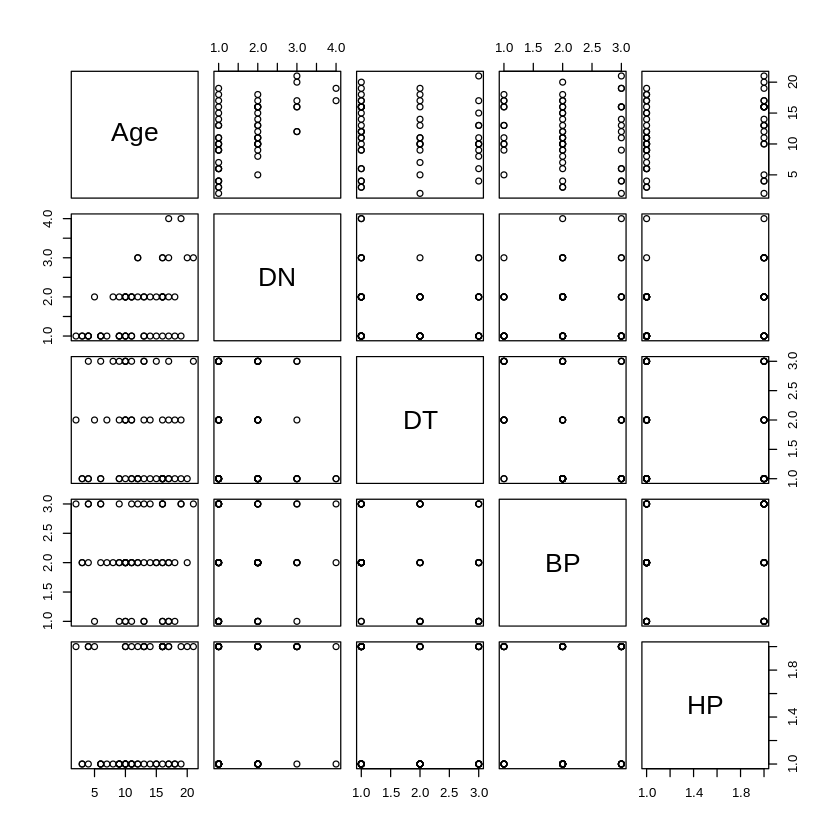

In [95]:
# feature selection
plot(cvdata[-6])

In [67]:
#Binarization
#from train data
cvdata.bin = traindata.num_age[,-7:-8]
orgname=colnames(cvdata.bin)
orgname[6] = "y"
colnames(cvdata.bin) = orgname
head(cvdata.bin)


## change columns with 3 level to 2 level 
#attribute 'Delivery number' { 1,2,3,4 } 
# -> DN==1( new 0) or others( new 1)
print("DN")
table(cvdata.bin$DN)
DN = ifelse(cvdata.bin$DN ==4  , 1, 0 ) 
cvdata.bin$DN = as.factor(DN)
table(cvdata.bin$DN)

#attribute 'Delivery time' { 0,1,2 } -> {0 = timely , 1 = premature , 2 = latecomer}
# -> DT==0(new 0) or others( new 1)
print("DT")
table(cvdata.bin$DT)
DT = ifelse(cvdata.bin$DT ==1  , 0, 1 ) 
cvdata.bin$DT = as.factor(DT)
table(cvdata.bin$DT)

#attribute 'Blood of Pressure' { 2,1,0 } -> {0 = low , 1 = normal , 2 = high }
# -> DT=0,1 ( new 0) or others ( new 1)
print("BP")
table(cvdata.bin$BP)
cvdata.bin$BP
BP = ifelse(cvdata.bin$BP == 2  , 1, 0 ) 
cvdata.bin$BP = as.factor(BP)
table(cvdata.bin$BP)

str(cvdata.bin)


#HP -> no change
print("HP")
table(cvdata.bin$HP)


,Age,DN,DT,BP,HP,y
1,6,1,0,2,0,0
3,10,2,1,1,0,0
6,10,1,1,0,0,0
7,11,2,0,1,0,0
9,12,2,0,1,0,0
10,11,1,1,1,0,1



 1  2  3  4 
26 21  7  2 


 0  1 
26 30 


 0  1  2 
28 15 13 


 0  1 
28 28 


 0  1  2 
12 28 16 

[1] 2 1 0 1 1 1 0 1 1 0 1 2 1 0 2 2 2 1 2 1 2 1 2 1 1 0 2 1 2 1 2 1 1 2 1 1 0 0
[39] 1 1 0 2 2 1 0 1 1 0 0 1 2 1 1 2 0 1
Levels: 0 1 2


 0  1 
40 16 

'data.frame':	56 obs. of  6 variables:
 $ Age: num  6 10 10 11 12 11 17 7 4 13 ...
 $ DN : Factor w/ 2 levels "0","1": 1 2 1 2 2 1 1 1 1 1 ...
 $ DT : Factor w/ 2 levels "0","1": 1 2 2 1 1 2 2 2 1 2 ...
 $ BP : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ y  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...



 0  1 
33 23 

In [79]:
#k-fold cross validation for binarization data
cvdata.bestset=bestglm(Xy=cvdata.bin, IC="CV", CVArgs=list(Method="HTF", K=2, REP=1), family=binomial)
summary(cvdata.best)

Morgan-Tatar search since family is non-gaussian.
Warning message in mean.default(y[!iTest]):
“argument is not numeric or logical: returning NA”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in mean.default(y[!iTest]):
“argument is not numeric or logical: returning NA”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’

ERROR: Error in `[.data.frame`(Xy, , c(bestset[-1], FALSE), drop = FALSE): undefined columns selected


In [96]:
## knn
library(class) # k-nearest neighbors
library(kknn) # weighted k-nearest neighbors
library(e1071) # SVM
library(caret)
library(MASS)
library(reshape2)
library(ggplot2)
library(kernlab)
library(pROC)



Attaching package: ‘kknn’

The following object is masked from ‘package:caret’:

    contr.dummy


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following object is masked from ‘package:glmnet’:

    auc

The following object is masked from ‘package:gmodels’:

    ci

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [86]:
subfit = regsubsets(y ~ ., data=cvdata)
summary(subfit)

Subset selection object
Call: regsubsets.formula(y ~ ., data = cvdata)
9 Variables  (and intercept)
    Forced in Forced out
Age     FALSE      FALSE
DN2     FALSE      FALSE
DN3     FALSE      FALSE
DN4     FALSE      FALSE
DT1     FALSE      FALSE
DT2     FALSE      FALSE
BP1     FALSE      FALSE
BP2     FALSE      FALSE
HP1     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         Age DN2 DN3 DN4 DT1 DT2 BP1 BP2 HP1
1  ( 1 ) " " " " " " " " " " " " " " " " "*"
2  ( 1 ) " " " " " " " " " " " " "*" " " "*"
3  ( 1 ) " " " " " " "*" " " " " "*" " " "*"
4  ( 1 ) " " " " " " " " "*" "*" "*" " " "*"
5  ( 1 ) " " " " " " "*" "*" "*" "*" " " "*"
6  ( 1 ) "*" " " " " "*" "*" "*" "*" " " "*"
7  ( 1 ) "*" " " " " "*" "*" "*" "*" "*" "*"
8  ( 1 ) "*" " " "*" "*" "*" "*" "*" "*" "*"

In [83]:
subfit = regsubset(CS ~ ., data=traindata.num_age)
subset(CS)

ERROR: Error in regsubset(CS ~ ., data = traindata.num_age): could not find function "regsubset"


In [ ]:
trainControl
train()